In [1]:
import autograd.numpy as np
import pandas as pd
import dill
import pyemma
from mdfeature.KramersRateEvaluator import KramersRateEvaluator
from mdfeature.potentials import shallow_well_potential, double_well_potential, quadruple_well_potential, ring_double_well_potential, muller_brown_potential
from mdfeature.diffusion_utils import compute_discrete_trajectory, correlation_coefficients_check, compute_kramers_rate_from_potential
from mdfeature.plot_utils import plot_free_energy_estimate, plot_free_energy_slice, plot_free_energy_surface, phase_plot, trajectory_plot, potential_contour_plot
import pydiffmap.diffusion_map as dfm
import matplotlib.pyplot as plt 
from mdfeature.Langevin import LangevinDynamics, PhysicalLangevinDynamics, MarkovProcess

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Data restore

In [13]:
#dill.dump(Q, file = open("double_ring_well_traj_phys.pickle", "wb"))
#double_well_traj = dill.load(open("double_well_traj.pickle", "rb"))
Q = dill.load(open("./miscdata/double_ring_well_traj_phys.pickle", "rb"))

# Toy Problems in Potential Energy Landscapes

In this notebook we look at
1. Double-Well (1D)
2. Quadruple-Well  (2D)
3. Ring Double Well (2D)
4. Muller-Brown Potential Energy Surface (2D)

## Langevin Dynamics

In [2]:
temperature = 300
R = 0.0083144621  # Universal Gas Constant kJ/K/mol
beta = 1.0 / (temperature * R)  # units (kJ/mol)**(-1)

step_size = 1e-4

shallow_well_sampler = LangevinDynamics(x0=0.0, potential=shallow_well_potential, beta=beta, time_step=step_size)
double_well_sampler = LangevinDynamics(x0=0.0, potential=double_well_potential, beta=beta, time_step=step_size)
quadruple_well_sampler = LangevinDynamics(x0=[0.0,0.0], potential=quadruple_well_potential, beta=beta, time_step=step_size)
ring_double_well_sampler = LangevinDynamics(x0=[0.2,1.0], potential=ring_double_well_potential, beta=beta, time_step=step_size)
muller_brown_sampler = LangevinDynamics(x0=[0.0,0.0], potential=muller_brown_potential, beta=beta, time_step=step_size)

Kramers Rate Evaluator

In [3]:
kre = KramersRateEvaluator(verbose=True)

Diffusion Maps

In [4]:
dmap = dfm.DiffusionMap.from_sklearn(epsilon = 'bgh', alpha = 0.5, k=64, kernel_type='gaussian', n_evecs=5, neighbor_params=None,
             metric='euclidean', metric_params=None, weight_fxn=None, density_fxn=None, bandwidth_type="-1/(d+2)",
             bandwidth_normalize=False, oos='nystroem')

### Shallow Well 

In [7]:
shallow_well_samples = shallow_well_sampler.simulate(number_of_steps=500000, burn_in=4000, num_processes=1)
shallow_well_traj = np.concatenate(shallow_well_samples).ravel()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [01:10<00:00, 7077.32it/s]


In [30]:
discrete_traj, cluster_centers = compute_discrete_trajectory(shallow_well_traj)
correlation_coefficients_check(beta, shallow_well_potential, discrete_traj, cluster_centers, 500, step_size)

NameError: name 'shallow_well_traj' is not defined

### Double well

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500000/1500000 [07:46<00:00, 3214.82it/s]


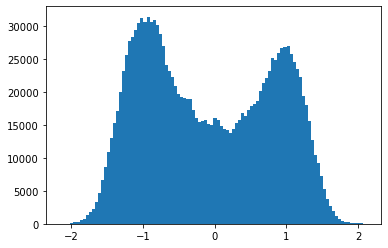

In [12]:
double_well_samples = double_well_sampler.simulate(number_of_steps=1500000, burn_in=1000, num_processes=1)
double_well_traj = np.concatenate(double_well_samples).ravel()
plt.hist(double_well_traj, bins=100)
plt.show()

In [15]:
dill.dump(double_well_traj, file = open("double_well_traj.pickle", "wb"))

In [5]:
double_well_traj = dill.load(open("double_well_traj.pickle", "rb"))

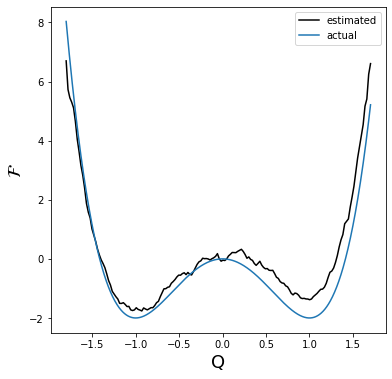

In [6]:
plot_free_energy_estimate(double_well_potential, double_well_traj, beta, "double_well_FES.pdf", minimum_counts=500)

initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

13-08-22 10:57:48 pyemma.coordinates.clustering.kmeans.KmeansClustering[0] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


/home/dominic/miniconda3/envs/diffusion/lib/python3.9/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"


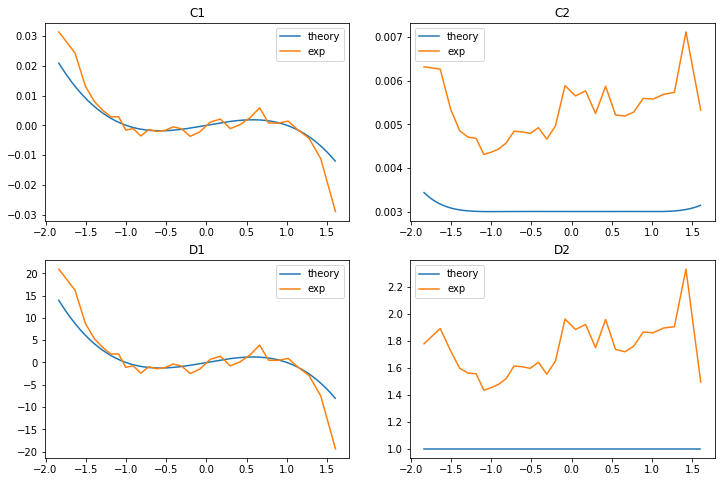

In [8]:
discrete_traj, cluster_centers = compute_discrete_trajectory(double_well_traj)
correlation_coefficients_check(beta, double_well_potential, discrete_traj, cluster_centers, 15, step_size)

Using default clustering provided.


estimating MaximumLikelihoodMSM:   0%|                                                                        …

0.0001 <class 'float'>
[4.58934022 3.88235599 3.37656155 2.79341757 2.16680816 2.3004531
 2.05682719 1.82170142 1.75110742 1.8001794  1.62108989 1.55619933
 1.45635399 1.35497551 1.35189436 1.3289721  1.28179649 1.32859425
 1.26475125 1.27080333 1.27543724 1.23925178 1.26827978 1.23666985
 1.20652777 1.22421544 1.17110846 1.21798767 1.20860437 1.20675666
 1.18088977 1.19501871 1.17035668 1.18146813 1.21061097 1.17316916
 1.19926755 1.17975285 1.18093971 1.19116325 1.16325849 1.1571314
 1.1692153  1.19488862 1.20766002 1.23377936 1.18564312 1.19368322
 1.19654994 1.20759503 1.22886909 1.19764767 1.20669725 1.18802152
 1.20282505 1.19530915 1.17986983 1.17259296 1.18156495 1.19973111
 1.19255165 1.22443337 1.26224835 1.28725235 1.31683832 1.27945941
 1.29202141 1.29594548 1.28500969 1.35867187 1.30651497 1.32893036
 1.32998492 1.31361232 1.34813673 1.33727101 1.34295992 1.32263556
 1.29766325 1.31878049 1.26574323 1.21461658 1.22916883 1.29596979
 1.27091609 1.26009831 1.28874099 1.23664

0.001 <class 'float'>
[1.26320972 1.33509372 1.22723921 1.23328808 1.03748959 1.21746894
 1.18097353 1.10467195 1.09548118 1.12112904 1.07533187 1.06481227
 1.07114931 1.05018011 1.03314131 1.08327366 1.03893724 1.00253234
 1.00322225 1.02428886 1.05443073 1.03268702 1.0180561  1.02295359
 0.99395545 0.99484267 0.99534308 1.01405134 0.99655125 0.98732817
 1.00843399 1.03493289 0.99667107 0.99393435 1.02667812 1.02120254
 1.01119677 1.03288203 1.02336973 1.01814335 1.00227409 0.99771075
 0.98895787 1.02038477 1.01545847 1.03540424 1.03097455 1.02021133
 1.01219813 1.0195237  1.00202455 1.01730798 0.98415951 0.99859731
 1.00015373 1.01174431 1.01519088 1.00731853 1.00813111 1.03043473
 1.00276238 0.99169178 1.01502794 1.05063232 1.04212758 1.04174148
 1.05452512 1.05435108 1.02324538 1.02390408 1.03163597 1.05909747
 1.03614708 1.05955782 1.07285806 1.03016277 1.03028089 1.02851935
 1.03391765 1.02613947 1.02917323 1.00641118 0.99841899 1.04077119
 1.03798585 1.06333886 1.05746144 1.0536

0.007500000000000001 <class 'float'>
[0.41841956 1.00780815 1.15688342 0.86340898 0.87179831 1.00464552
 1.06069175 0.95971974 0.90635279 0.87425634 0.88945069 0.92112006
 0.89260541 0.90695286 0.92335943 0.93140377 0.92587773 0.91463556
 0.91237094 0.96792822 0.99843749 0.95891984 0.93256094 0.93080887
 0.92367469 0.91290152 0.93539352 0.9546902  0.96771749 0.94690023
 0.94116139 0.94012001 0.93058907 0.95428307 0.95697791 0.925332
 0.91694562 0.94280753 0.97027868 0.9772138  0.97431187 0.94954652
 0.96957664 0.97838259 0.97148271 0.98279025 0.97886725 0.99055567
 0.97876329 0.97144718 0.98322899 0.9818044  0.97956025 0.9770111
 0.96022267 0.96246396 0.96237988 0.95380563 0.97169474 0.97182385
 0.94779644 0.97333375 1.00579783 1.00429708 0.99419432 1.02600179
 1.03281025 1.03734633 1.04170642 1.04030622 1.04658768 1.04758765
 1.04775861 1.01537635 0.98985484 0.96832602 0.96808629 0.92519856
 0.92913234 0.92718387 0.97138939 0.98675336 1.00609438 1.04052024
 1.00997671 0.99964104 1.021

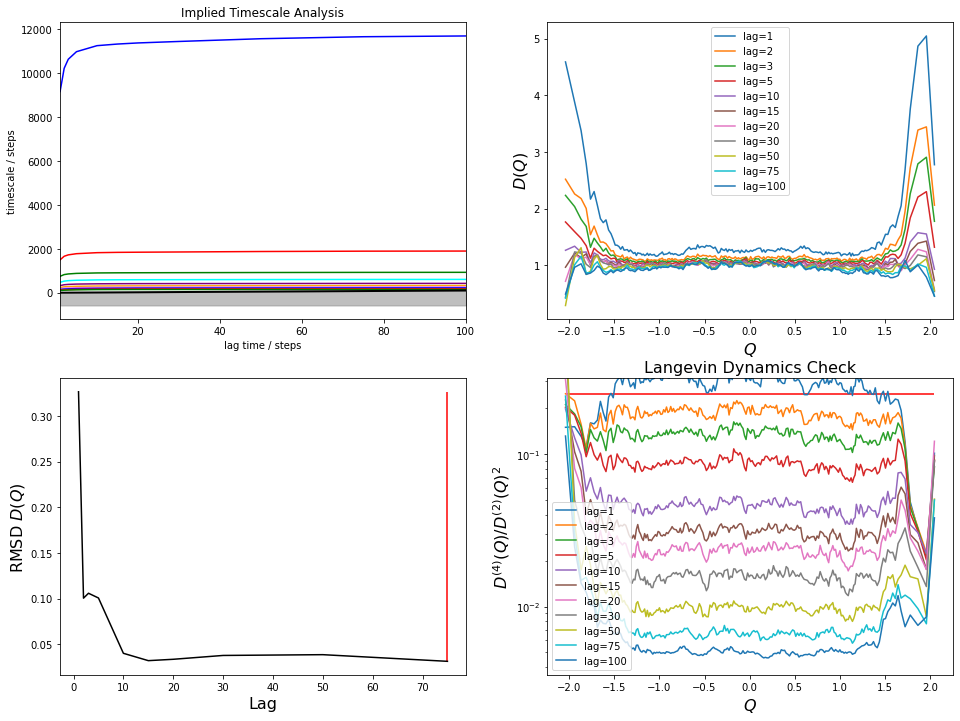

0.0015 <class 'float'>
[0.96404559 1.21209252 1.13438667 1.20011111 0.9988924  1.14771985
 1.18699524 1.08644874 1.0577075  1.07797619 1.02778674 1.05327339
 1.02919475 1.00438597 1.00264605 1.05699209 1.0084213  0.99811629
 0.99837876 1.00916308 1.05270584 1.0217147  1.02145102 1.01684811
 0.98497391 0.98631841 0.97834328 0.97218018 0.99559085 0.97487331
 0.99277101 1.01799248 0.98054253 1.00751924 1.02081381 1.0214522
 1.02076985 1.02975388 1.01672822 1.01505157 1.01172502 1.00325215
 0.98703178 1.01055094 1.01037529 1.03258565 1.01968763 1.02240513
 1.01168964 1.01242914 1.00933737 1.01077667 0.97568969 0.98747345
 0.98582516 0.99171573 1.00319914 1.00288949 0.99987982 1.02737584
 0.99528288 0.98878734 1.00914452 1.0329814  1.04597137 1.0385565
 1.04507639 1.0537794  1.02337958 1.00065931 1.02175009 1.04136431
 1.04456231 1.08107287 1.06865492 1.03689674 1.01535193 1.02229375
 1.01621665 1.01908511 1.00412094 0.99512175 1.00949583 1.03423353
 1.03514661 1.05822245 1.04348856 1.04494

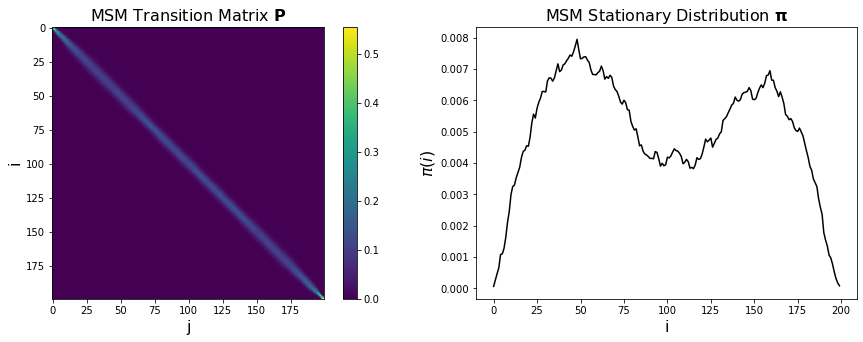

Free energy profile suggests 2 minima.
Minima  (-0.951, 0.041)
Minima  (0.981, 0.402)


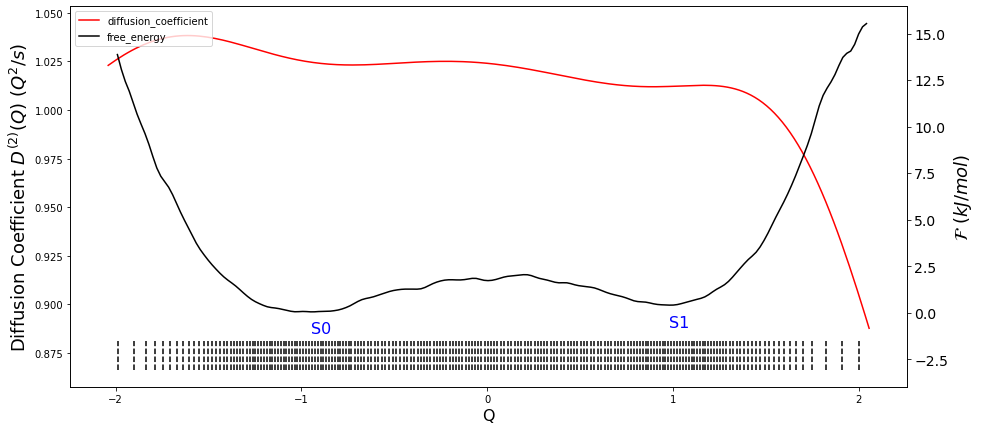

Kramer's Rates
-------------------------
S0 --> S1 : 5.009893e-01
S1 --> S0 : 5.495701e-01
-------------------------


[((0, 1), 0.5009893224441713), ((1, 0), 0.549570053348226)]

In [9]:
kre.fit(double_well_traj, 
        beta, 
        sigmaD=0.5,
        sigmaF=0.025,
        lag=15,
        time_step=step_size,
        k=200)

In [8]:
def diffusion_function(x):
    return 1

analytic_kramers_rate = compute_kramers_rate_from_potential(double_well_potential, beta, -1, 1, diffusion_function)
print(analytic_kramers_rate)

0.4627658580543349


In [ ]:
kre.msm.compute_transition_rate(state_A = [-1.02, -0.98], state_B = [0.98, 1.02])

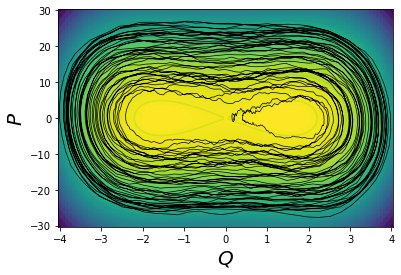

In [6]:
# Double well (1D)
def test_potential(x):
    h = 2.5
    c = 2
    return -(1/4)*(x**2)*(h**4) + (1/2)*(c**2)*(x**4)


T = 100.0
M = 1.0
gamma = 0.05
time_step = 0.01

def hamiltonian(x, y):
    return - ((y ** 2) / (2*M)  + test_potential(x))

Q_range = np.linspace(-4, 4, 100)
P_range = np.linspace(-30, 30, 100)
Q_mesh, P_mesh = np.meshgrid(Q_range, P_range)
plt.pcolormesh(Q_range, P_range, hamiltonian(Q_mesh, P_mesh))
plt.contour(Q_range, P_range, hamiltonian(Q_mesh, P_mesh), levels = 15)
plt.xlabel(r'$Q$', fontsize=20)
plt.ylabel(r'$P$', fontsize=20)

double_well_sampler = PhysicalLangevinDynamics(U=test_potential, gamma=gamma, M=M, T=T, Q0=-0.5, time_step=time_step)
Q, P = double_well_sampler.simulate(number_of_steps=5000, burn_in=250)
plt.plot(Q, P, 'k', linewidth=0.7)
plt.savefig("Langevin.pdf", format="pdf", bbox_inches="tight")

plt.show()



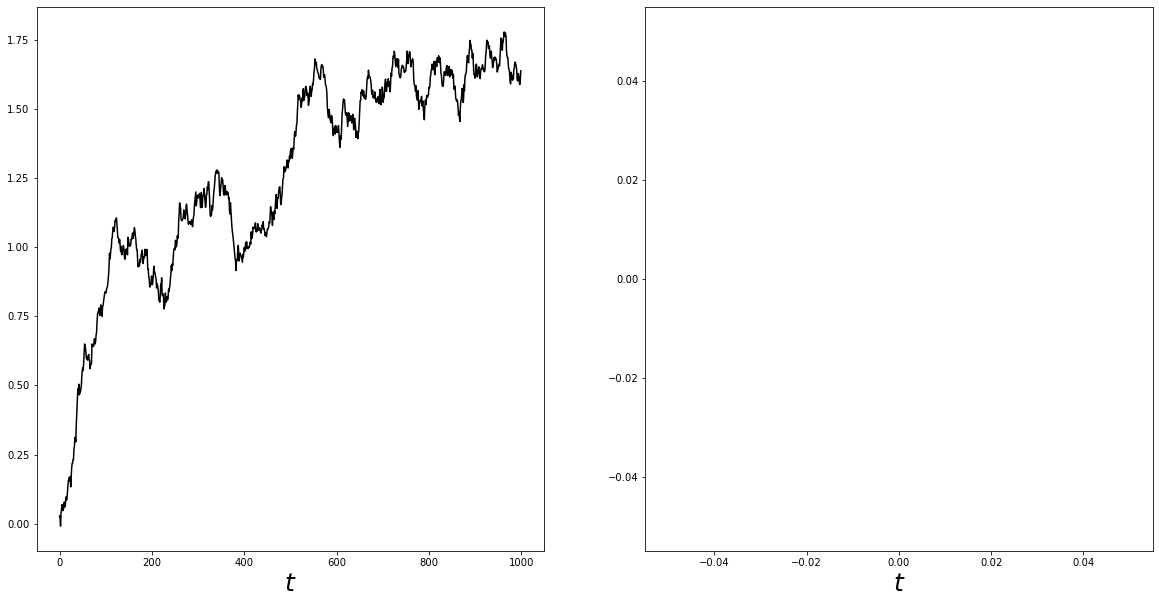

In [4]:
def drift(x):
    return np.sin(x)


def fragment(trajectory, threshold):
    previous = trajectory[0]
    for position, value in enumerate(trajectory):
        current = value
        if np.abs(previous - current) > threshold:
            return trajectory[:position], fragment(trajectory[position:], threshold)
        previous = current
    return None

mp = MarkovProcess(drift=drift, diffusion=0.2, jump_frequency=100.0, jump_amplitude=0.5, time_step=0.01)
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(20,10)
traj1 = mp.simulate(number_of_steps=1000)

list_of_fragment_series = fragment(traj1, threshold=0.1)
for time_series in [0]:
    if time_series is not None:
        ax2.plot(time_series, c='k', linewidth=1.5)
mp = MarkovProcess(drift=drift, diffusion=0.2, jump_frequency=10000000000, jump_amplitude=0.5, time_step=0.01)
traj2 = mp.simulate(number_of_steps=1000)
ax1.plot(traj2, c='k', linewidth=1.5)
ax1.set_xlabel(r'$t$', fontsize=25)
ax2.set_xlabel(r'$t$', fontsize=25)
plt.show()


### Quadruple Well

In [22]:
quadruple_well_samples = quadruple_well_sampler.simulate(number_of_steps=10000000, burn_in=4000)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 909090/909090 [11:38<00:00, 1301.43it/s]


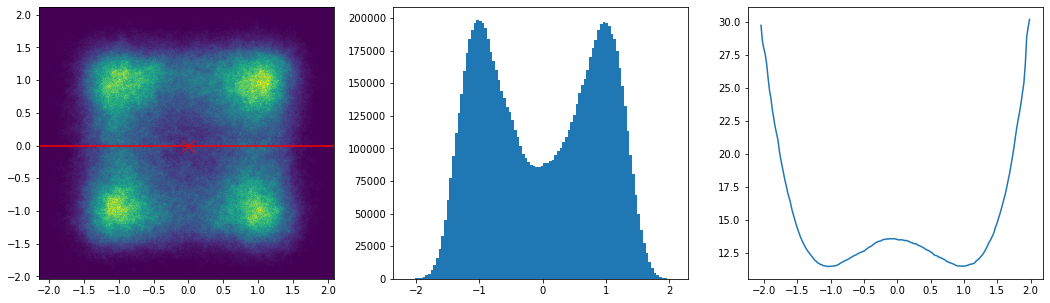

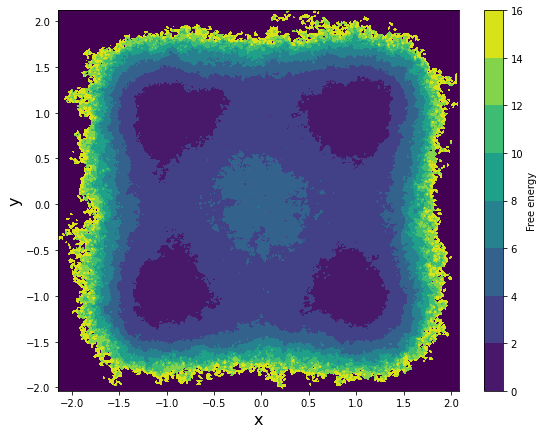

In [23]:
quadruple_well_projected_traj = plot_free_energy_slice(quadruple_well_samples, beta, np.array([0,0]), 0, minimum_counts=50)
plot_free_energy_surface(quadruple_well_samples, beta)

In [ ]:
kre.fit(quadruple_well_projected_traj, 
        beta, 
        sigmaD=0.5,
        sigmaF=0.00025,
        lag = 3,
        bins=200, 
        step_size=step_size,
        minima_prominance=2.0, 
        cluster_type='kmeans',
        options={'k': 200, 'stride': 5, 'max_iter': 150,
         'max_centers': 1000, 'metric': 'euclidean', 'n_jobs': None, 'dmin': 0.002})

### Ring double well

/home/dominic/PycharmProjects/mdfeature/src/mdfeature/plot_utils.py:205: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Q0_range, Q1_range, U([Q0_mesh, Q1_mesh]))


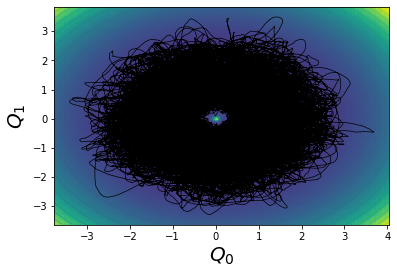

In [16]:
Q0 = np.random.normal(size=2)
physical_LD_ring_double_well = PhysicalLangevinDynamics(U=ring_double_well_potential, gamma=1, M=1, T=1, Q0=Q0, time_step=3e-2)
Q, P = physical_LD_ring_double_well.simulate(number_of_steps=500000)
trajectory_plot(Q[:,0], Q[:,1], U=ring_double_well_potential)
#ring_double_well_samples = ring_double_well_sampler.simulate(number_of_steps=3000000, burn_in=4000)

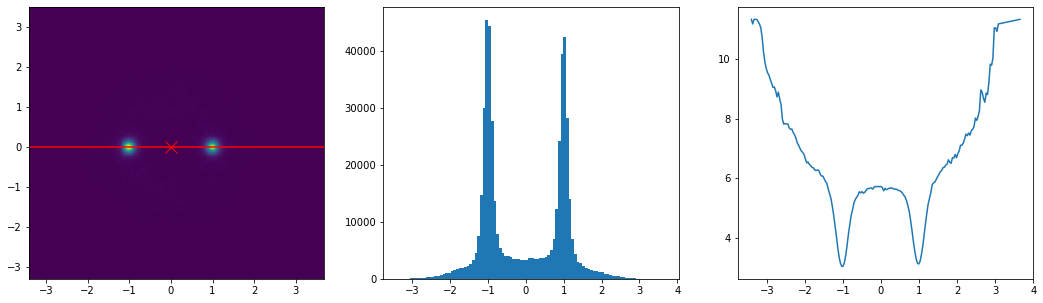

TypeError: list indices must be integers or slices, not tuple

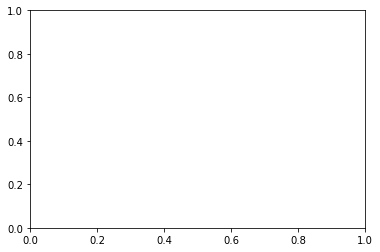

In [14]:
#set beta consistently
ring_double_well_projected_traj = plot_free_energy_slice([Q], 1, np.array([0,0]), 0, minimum_counts=5)
plot_free_energy_surface([Q], 1)

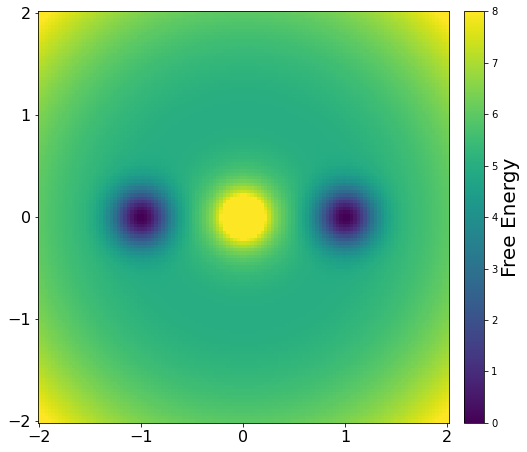

In [5]:
potential_contour_plot(x_min=-2, x_max=2, y_min=-2, y_max=2, U=ring_double_well_potential, vmin=0, vmax=8, save_name="RingDoubleWellPotential.pdf")

In [8]:
Q0 = np.array([0.2, 1.0])
physical_LD_ring_double_well = PhysicalLangevinDynamics(U=ring_double_well_potential, gamma=1, M=1, T=1, Q0=Q0, time_step=3e-2)
Q, P = physical_LD_ring_double_well.simulate(number_of_steps=200000, burn_in=0)
dill.dump(Q, file = open("ring_traj_phys_200K.pickle", "wb"))
#ring_dmap = dmap.fit(Q)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [02:48<00:00, 1188.10it/s]


In [15]:
ring_dmap = dmap.fit(Q[::50].copy())
dill.dump(ring_dmap, file = open("ring_dmap_phys_200K.pickle", "wb"))

In [56]:
ring_double_well_projected_traj = plot_free_energy_slice(Q, beta, np.array([0,0]), 0, minimum_counts=5000)
plot_free_energy_surface(Q_prime, beta)

ValueError: operands could not be broadcast together with shapes (1000000,) (2,) 

(500000, 2)
8.029956634767704 0.0


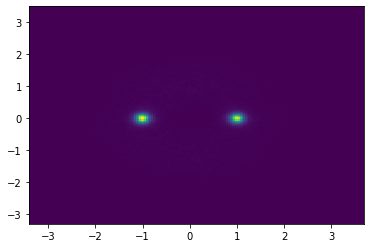

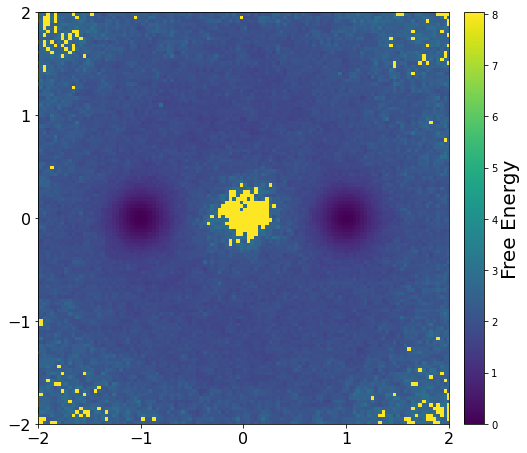

In [58]:
#ring_double_well_projected_traj = plot_free_energy_slice(ring_double_well_samples, beta, np.array([0,0]), 0, minimum_counts=5000)
print(Q.shape)
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_free_energy_surface(samples, beta, bins=200):
    concatenated_samples = np.concatenate(samples)
    free_energy, fig, axs, xedges, yedges = free_energy_estimate_2D(samples, beta, bins=bins)
    print(np.max(free_energy),np.min(free_energy))
    plt.show()
#     fig.set_size_inches(9, 7)
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)
    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    axs.set_aspect('equal')
    im = axs.pcolormesh(xedges, yedges, free_energy.T)
    divider = make_axes_locatable(axs)
    cax = divider.append_axes("right", size="5%", pad=0.20)
    cb = plt.colorbar(im, cax=cax)
    cb.set_label(label='Free Energy', fontsize=20)
    axs.xaxis.set_ticks([-2, -1, 0, 1, 2])
    axs.yaxis.set_ticks([-2, -1, 0, 1, 2])
    axs.set_xlim([-2,2])
    axs.set_ylim([-2,2])
    axs.tick_params(axis='x', labelsize=16)
    axs.tick_params(axis='y', labelsize=16)
#     plt.xlim([-2,2])
#     plt.ylim([-2,2])
    plt.show()
#     clb = axs.contourf(xedges[1:], yedges[1:], free_energy.T)
#     plt.colorbar(clb, label='Free Energy', ax=axs)

#     plt.xlabel('x', fontsize=16)
#     plt.ylabel('y', fontsize=16)
#     plt.show()

def free_energy_estimate_2D(samples, beta, bins=200):
    fig, axs = plt.subplots(1, 1)
    h, xedges, yedges, quadmesh = axs.hist2d(samples[:, 0], samples[:, 1], bins=bins)
    total_counts = np.sum(h)
    with np.errstate(divide='ignore'):
        free_energy = - (1 / beta) * np.log(h / total_counts + 0.000000000001)
        free_energy = np.nan_to_num(free_energy, nan=0)

    return free_energy - np.min(free_energy), fig, axs, xedges, yedges

plot_free_energy_surface(Q, 2.8)

In [129]:
from time import time
def compute_PCA(traj, dim, stride=1, featurized=True):
    t0 = time()
    PCA = pyemma.coordinates.pca(traj, dim=dim, stride=stride)
    t1 = time()
    print(f"Computed PCA in {round(t1-t0,3)}s.")
    return PCA

def compute_TICA(traj, dim, lag, stride=1, featurized=True, kinetic_map=True):
    t0 = time()
    TICA = pyemma.coordinates.tica(traj, lag=lag, dim=dim, stride=stride, kinetic_map=kinetic_map)
    t1 = time()
    print(f"Computed TICA in {round(t1-t0,3)}s.")
    return TICA

def compute_VAMP(traj, dim, lag, stride=1, featurized=True):
    t0 = time()
    VAMP = pyemma.coordinates.vamp(traj, lag=lag, dim=dim, stride=stride)
    t1 = time()
    print(f"Computed VAMP in {round(t1-t0,3)}s.")
    return VAMP

def compute_DMAP(traj, stride, featurized=True):
    t0 = time()
    DMAP = dmap.fit(traj[::stride])
    t1 = time()
    print(f"Computed DMAP in {round(t1-t0,3)}s.")
    return DMAP

def free_energy_estimate(samples, beta, minimum_counts=50):
    # histogram
    counts, coordinate = np.histogram(samples, bins=200)
    robust_counts = counts[np.where(counts > minimum_counts)]
    robust_coordinates = coordinate[np.where(counts > minimum_counts)]

    # log normal
    normalised_counts = robust_counts / np.sum(counts)
    with np.errstate(divide='ignore'):
        free_energy = - (1 / beta) * np.log(normalised_counts)

    return free_energy, robust_coordinates

In [137]:
DMAP_traj = dill.load(open("./miscdata/dmap_extra_long.pickle", "rb"))

/home/dominic/miniconda3/envs/diffusion/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator NearestNeighbors from version 1.1.0 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Computed PCA in 0.016s.
Computed TICA in 0.046s.
Computed VAMP in 0.042s.


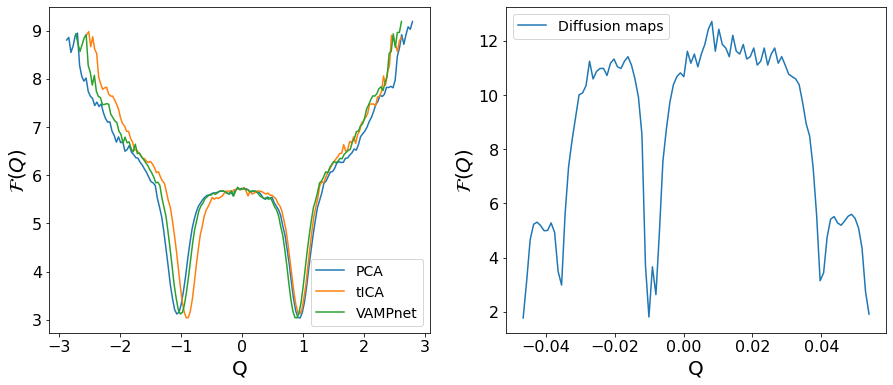

In [155]:
fig, ax = plt.subplots(1,2)


def free_energy_estimate(samples, beta, minimum_counts=50, bins=200):
    # histogram
    counts, coordinate = np.histogram(samples, bins=bins)
    robust_counts = counts[np.where(counts > minimum_counts)]
    robust_coordinates = coordinate[np.where(counts > minimum_counts)]

    # log normal
    normalised_counts = robust_counts / np.sum(counts)
    with np.errstate(divide='ignore'):
        free_energy = - (1 / beta) * np.log(normalised_counts)

    return free_energy, robust_coordinates


PCA_traj = compute_PCA(Q, dim=1, stride=1).get_output()[0]
y, x = free_energy_estimate(PCA_traj, beta=1, minimum_counts=50)
ax[0].plot(x, y, label='PCA')

TICA_traj = compute_TICA(Q, lag=10, dim=1, stride=1).get_output()[0]
y, x = free_energy_estimate(TICA_traj, beta=1, minimum_counts=50)
ax[0].plot(x, y, label='tICA')

VAMP_traj = compute_VAMP(Q, lag=10, dim=1, stride=1).get_output()[0]
y, x = free_energy_estimate(VAMP_traj, beta=1, minimum_counts=50)
ax[0].plot(x, y, label='VAMPnet')

y, x = free_energy_estimate(DMAP_traj.dmap[:,0], beta=1, minimum_counts=1, bins=100)
ax[1].plot(x, y, label='Diffusion maps')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax[0].set_xlabel('Q', fontsize=20)
ax[0].set_ylabel(r'$\mathcal{F}(Q)$', fontsize=20)
ax[0].legend(fontsize=14)


ax[0].tick_params(axis='x', labelsize=16)
ax[0].tick_params(axis='y', labelsize=16)

ax[1].set_xlabel('Q', fontsize=20)
ax[1].set_ylabel(r'$\mathcal{F}(Q)$', fontsize=20)
ax[1].legend(fontsize=14)

fig.set_size_inches(15,6)

plt.savefig("free_energy_comparison.pdf")
#ax[1].hist(DMAP_traj.dmap[:,0], bins=500)
#ax[1].set_yscale('log', nonposy='clip')
# plt.show()
# y, x = free_energy_estimate(DMAP_traj.dmap[:,0], beta=1, minimum_counts=50)
# plt.plot(x, y)

/home/dominic/PycharmProjects/mdfeature/src/mdfeature/KramersRateEvaluator.py:33: UserWarning: NaN values were found in the free energy calculation. Consider using a longer trajectory or rerunning with fewer bins (currently bins=200). Fixing with imputation for now.
  warnings.warn(f"NaN values were found in the free energy calculation. "


Note: Of the 200 free energy evaluations, 1 were NaN values.
Using default clustering provided.


estimating MaximumLikelihoodMSM:   0%|                                                                        …

0.0001 <class 'float'>
[4.58934022 3.88235599 3.37656155 2.79341757 2.16680816 2.3004531
 2.05682719 1.82170142 1.75110742 1.8001794  1.62108989 1.55619933
 1.45635399 1.35497551 1.35189436 1.3289721  1.28179649 1.32859425
 1.26475125 1.27080333 1.27543724 1.23925178 1.26827978 1.23666985
 1.20652777 1.22421544 1.17110846 1.21798767 1.20860437 1.20675666
 1.18088977 1.19501871 1.17035668 1.18146813 1.21061097 1.17316916
 1.19926755 1.17975285 1.18093971 1.19116325 1.16325849 1.1571314
 1.1692153  1.19488862 1.20766002 1.23377936 1.18564312 1.19368322
 1.19654994 1.20759503 1.22886909 1.19764767 1.20669725 1.18802152
 1.20282505 1.19530915 1.17986983 1.17259296 1.18156495 1.19973111
 1.19255165 1.22443337 1.26224835 1.28725235 1.31683832 1.27945941
 1.29202141 1.29594548 1.28500969 1.35867187 1.30651497 1.32893036
 1.32998492 1.31361232 1.34813673 1.33727101 1.34295992 1.32263556
 1.29766325 1.31878049 1.26574323 1.21461658 1.22916883 1.29596979
 1.27091609 1.26009831 1.28874099 1.23664

0.001 <class 'float'>
[1.26320972 1.33509372 1.22723921 1.23328808 1.03748959 1.21746894
 1.18097353 1.10467195 1.09548118 1.12112904 1.07533187 1.06481227
 1.07114931 1.05018011 1.03314131 1.08327366 1.03893724 1.00253234
 1.00322225 1.02428886 1.05443073 1.03268702 1.0180561  1.02295359
 0.99395545 0.99484267 0.99534308 1.01405134 0.99655125 0.98732817
 1.00843399 1.03493289 0.99667107 0.99393435 1.02667812 1.02120254
 1.01119677 1.03288203 1.02336973 1.01814335 1.00227409 0.99771075
 0.98895787 1.02038477 1.01545847 1.03540424 1.03097455 1.02021133
 1.01219813 1.0195237  1.00202455 1.01730798 0.98415951 0.99859731
 1.00015373 1.01174431 1.01519088 1.00731853 1.00813111 1.03043473
 1.00276238 0.99169178 1.01502794 1.05063232 1.04212758 1.04174148
 1.05452512 1.05435108 1.02324538 1.02390408 1.03163597 1.05909747
 1.03614708 1.05955782 1.07285806 1.03016277 1.03028089 1.02851935
 1.03391765 1.02613947 1.02917323 1.00641118 0.99841899 1.04077119
 1.03798585 1.06333886 1.05746144 1.0536

0.007500000000000001 <class 'float'>
[0.41841956 1.00780815 1.15688342 0.86340898 0.87179831 1.00464552
 1.06069175 0.95971974 0.90635279 0.87425634 0.88945069 0.92112006
 0.89260541 0.90695286 0.92335943 0.93140377 0.92587773 0.91463556
 0.91237094 0.96792822 0.99843749 0.95891984 0.93256094 0.93080887
 0.92367469 0.91290152 0.93539352 0.9546902  0.96771749 0.94690023
 0.94116139 0.94012001 0.93058907 0.95428307 0.95697791 0.925332
 0.91694562 0.94280753 0.97027868 0.9772138  0.97431187 0.94954652
 0.96957664 0.97838259 0.97148271 0.98279025 0.97886725 0.99055567
 0.97876329 0.97144718 0.98322899 0.9818044  0.97956025 0.9770111
 0.96022267 0.96246396 0.96237988 0.95380563 0.97169474 0.97182385
 0.94779644 0.97333375 1.00579783 1.00429708 0.99419432 1.02600179
 1.03281025 1.03734633 1.04170642 1.04030622 1.04658768 1.04758765
 1.04775861 1.01537635 0.98985484 0.96832602 0.96808629 0.92519856
 0.92913234 0.92718387 0.97138939 0.98675336 1.00609438 1.04052024
 1.00997671 0.99964104 1.021

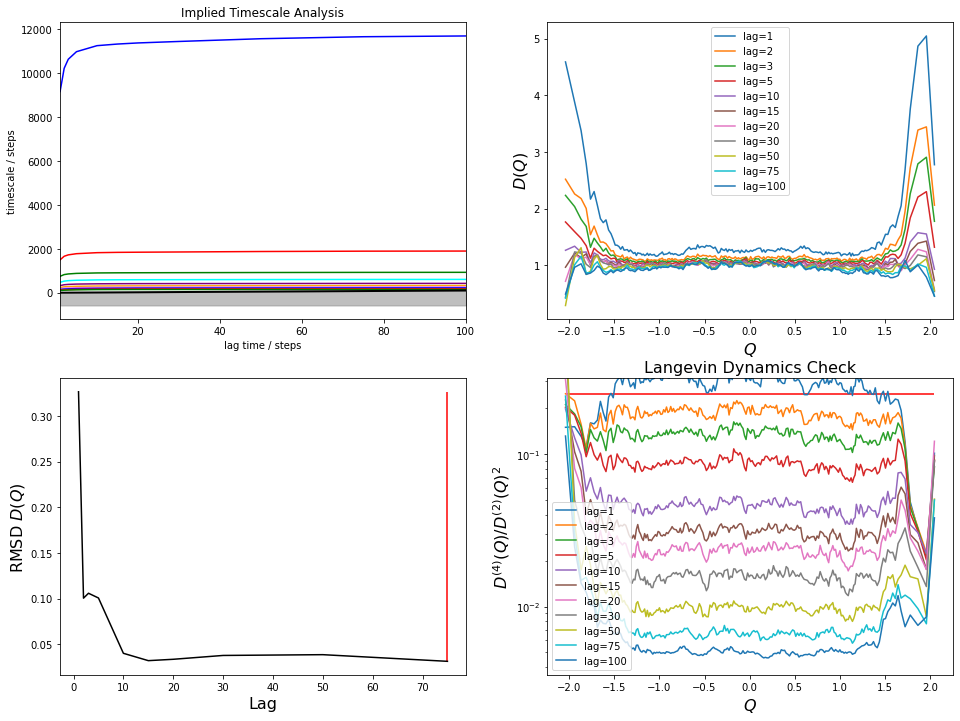

0.0015 <class 'float'>
[0.96404559 1.21209252 1.13438667 1.20011111 0.9988924  1.14771985
 1.18699524 1.08644874 1.0577075  1.07797619 1.02778674 1.05327339
 1.02919475 1.00438597 1.00264605 1.05699209 1.0084213  0.99811629
 0.99837876 1.00916308 1.05270584 1.0217147  1.02145102 1.01684811
 0.98497391 0.98631841 0.97834328 0.97218018 0.99559085 0.97487331
 0.99277101 1.01799248 0.98054253 1.00751924 1.02081381 1.0214522
 1.02076985 1.02975388 1.01672822 1.01505157 1.01172502 1.00325215
 0.98703178 1.01055094 1.01037529 1.03258565 1.01968763 1.02240513
 1.01168964 1.01242914 1.00933737 1.01077667 0.97568969 0.98747345
 0.98582516 0.99171573 1.00319914 1.00288949 0.99987982 1.02737584
 0.99528288 0.98878734 1.00914452 1.0329814  1.04597137 1.0385565
 1.04507639 1.0537794  1.02337958 1.00065931 1.02175009 1.04136431
 1.04456231 1.08107287 1.06865492 1.03689674 1.01535193 1.02229375
 1.01621665 1.01908511 1.00412094 0.99512175 1.00949583 1.03423353
 1.03514661 1.05822245 1.04348856 1.04494

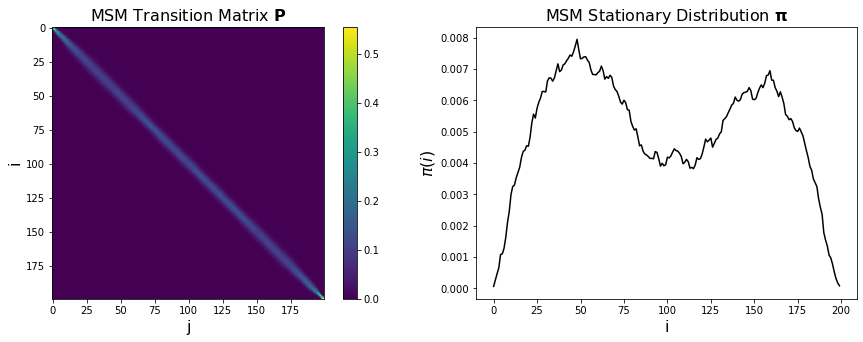

Free energy profile suggests 3 minima.
Minima  (-3.726, 21.301)
Minima  (-1.067, 0.281)
Minima  (0.954, 0.075)


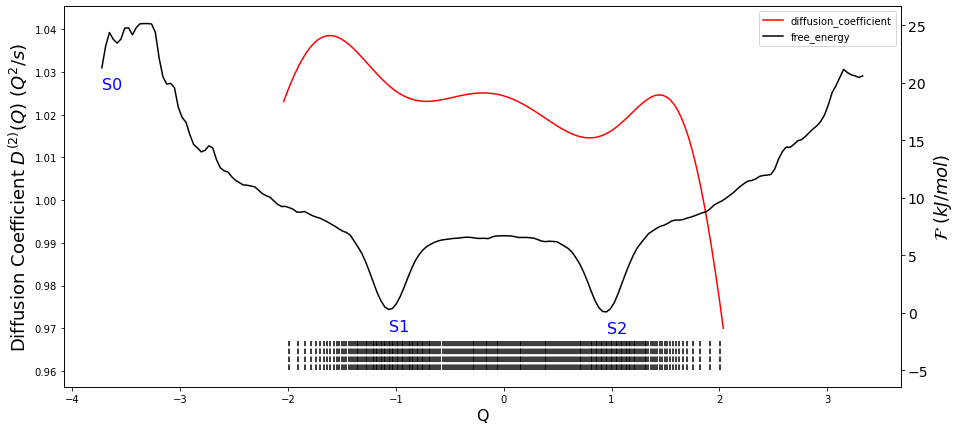

Kramer's Rates
-------------------------
S0 --> S1 : 3.006402e-02
S0 --> S2 : 2.565880e-03
S1 --> S0 : 6.017496e-04
S1 --> S2 : 2.681469e-01
S2 --> S0 : 1.767297e-04
S2 --> S1 : 2.420987e-01
-------------------------


[((0, 1), 0.030064015045266287),
 ((0, 2), 0.002565879545972091),
 ((1, 0), 0.0006017495506274174),
 ((1, 2), 0.2681468863474331),
 ((2, 0), 0.0001767297133204842),
 ((2, 1), 0.24209874110538193)]

In [113]:
gamma=1 
M=1
T=1
time_step=3e-2
R = 0.0083144621  # Universal Gas Constant kJ/K/mol
beta = 1.0 / (temperature * R)  # units (kJ/mol)**(-1)

kre.fit(PCA_traj, 
        beta, 
        sigmaD=0.5,
        sigmaF=0.025,
        lag=15,
        time_step=step_size,
        k=200)

/home/dominic/PycharmProjects/mdfeature/src/mdfeature/KramersRateEvaluator.py:33: UserWarning: NaN values were found in the free energy calculation. Consider using a longer trajectory or rerunning with fewer bins (currently bins=200). Fixing with imputation for now.
  warnings.warn(f"NaN values were found in the free energy calculation. "


Note: Of the 200 free energy evaluations, 1 were NaN values.
Using default clustering provided.


estimating MaximumLikelihoodMSM:   0%|                                                                        …

0.0001 <class 'float'>
[4.58934022 3.88235599 3.37656155 2.79341757 2.16680816 2.3004531
 2.05682719 1.82170142 1.75110742 1.8001794  1.62108989 1.55619933
 1.45635399 1.35497551 1.35189436 1.3289721  1.28179649 1.32859425
 1.26475125 1.27080333 1.27543724 1.23925178 1.26827978 1.23666985
 1.20652777 1.22421544 1.17110846 1.21798767 1.20860437 1.20675666
 1.18088977 1.19501871 1.17035668 1.18146813 1.21061097 1.17316916
 1.19926755 1.17975285 1.18093971 1.19116325 1.16325849 1.1571314
 1.1692153  1.19488862 1.20766002 1.23377936 1.18564312 1.19368322
 1.19654994 1.20759503 1.22886909 1.19764767 1.20669725 1.18802152
 1.20282505 1.19530915 1.17986983 1.17259296 1.18156495 1.19973111
 1.19255165 1.22443337 1.26224835 1.28725235 1.31683832 1.27945941
 1.29202141 1.29594548 1.28500969 1.35867187 1.30651497 1.32893036
 1.32998492 1.31361232 1.34813673 1.33727101 1.34295992 1.32263556
 1.29766325 1.31878049 1.26574323 1.21461658 1.22916883 1.29596979
 1.27091609 1.26009831 1.28874099 1.23664

0.001 <class 'float'>
[1.26320972 1.33509372 1.22723921 1.23328808 1.03748959 1.21746894
 1.18097353 1.10467195 1.09548118 1.12112904 1.07533187 1.06481227
 1.07114931 1.05018011 1.03314131 1.08327366 1.03893724 1.00253234
 1.00322225 1.02428886 1.05443073 1.03268702 1.0180561  1.02295359
 0.99395545 0.99484267 0.99534308 1.01405134 0.99655125 0.98732817
 1.00843399 1.03493289 0.99667107 0.99393435 1.02667812 1.02120254
 1.01119677 1.03288203 1.02336973 1.01814335 1.00227409 0.99771075
 0.98895787 1.02038477 1.01545847 1.03540424 1.03097455 1.02021133
 1.01219813 1.0195237  1.00202455 1.01730798 0.98415951 0.99859731
 1.00015373 1.01174431 1.01519088 1.00731853 1.00813111 1.03043473
 1.00276238 0.99169178 1.01502794 1.05063232 1.04212758 1.04174148
 1.05452512 1.05435108 1.02324538 1.02390408 1.03163597 1.05909747
 1.03614708 1.05955782 1.07285806 1.03016277 1.03028089 1.02851935
 1.03391765 1.02613947 1.02917323 1.00641118 0.99841899 1.04077119
 1.03798585 1.06333886 1.05746144 1.0536

0.007500000000000001 <class 'float'>
[0.41841956 1.00780815 1.15688342 0.86340898 0.87179831 1.00464552
 1.06069175 0.95971974 0.90635279 0.87425634 0.88945069 0.92112006
 0.89260541 0.90695286 0.92335943 0.93140377 0.92587773 0.91463556
 0.91237094 0.96792822 0.99843749 0.95891984 0.93256094 0.93080887
 0.92367469 0.91290152 0.93539352 0.9546902  0.96771749 0.94690023
 0.94116139 0.94012001 0.93058907 0.95428307 0.95697791 0.925332
 0.91694562 0.94280753 0.97027868 0.9772138  0.97431187 0.94954652
 0.96957664 0.97838259 0.97148271 0.98279025 0.97886725 0.99055567
 0.97876329 0.97144718 0.98322899 0.9818044  0.97956025 0.9770111
 0.96022267 0.96246396 0.96237988 0.95380563 0.97169474 0.97182385
 0.94779644 0.97333375 1.00579783 1.00429708 0.99419432 1.02600179
 1.03281025 1.03734633 1.04170642 1.04030622 1.04658768 1.04758765
 1.04775861 1.01537635 0.98985484 0.96832602 0.96808629 0.92519856
 0.92913234 0.92718387 0.97138939 0.98675336 1.00609438 1.04052024
 1.00997671 0.99964104 1.021

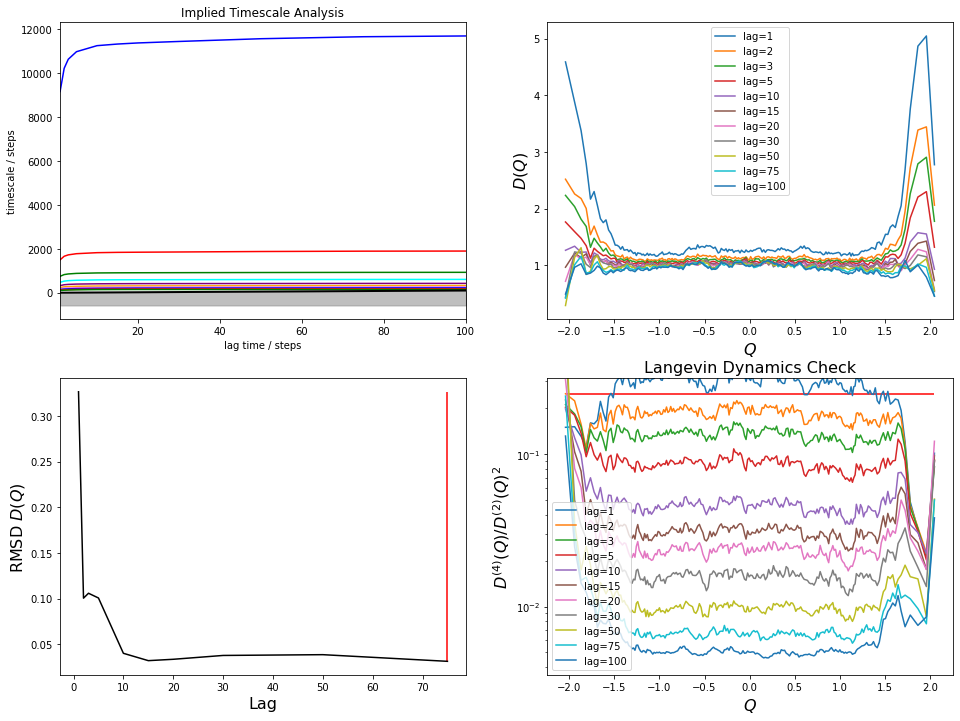

0.0015 <class 'float'>
[0.96404559 1.21209252 1.13438667 1.20011111 0.9988924  1.14771985
 1.18699524 1.08644874 1.0577075  1.07797619 1.02778674 1.05327339
 1.02919475 1.00438597 1.00264605 1.05699209 1.0084213  0.99811629
 0.99837876 1.00916308 1.05270584 1.0217147  1.02145102 1.01684811
 0.98497391 0.98631841 0.97834328 0.97218018 0.99559085 0.97487331
 0.99277101 1.01799248 0.98054253 1.00751924 1.02081381 1.0214522
 1.02076985 1.02975388 1.01672822 1.01505157 1.01172502 1.00325215
 0.98703178 1.01055094 1.01037529 1.03258565 1.01968763 1.02240513
 1.01168964 1.01242914 1.00933737 1.01077667 0.97568969 0.98747345
 0.98582516 0.99171573 1.00319914 1.00288949 0.99987982 1.02737584
 0.99528288 0.98878734 1.00914452 1.0329814  1.04597137 1.0385565
 1.04507639 1.0537794  1.02337958 1.00065931 1.02175009 1.04136431
 1.04456231 1.08107287 1.06865492 1.03689674 1.01535193 1.02229375
 1.01621665 1.01908511 1.00412094 0.99512175 1.00949583 1.03423353
 1.03514661 1.05822245 1.04348856 1.04494

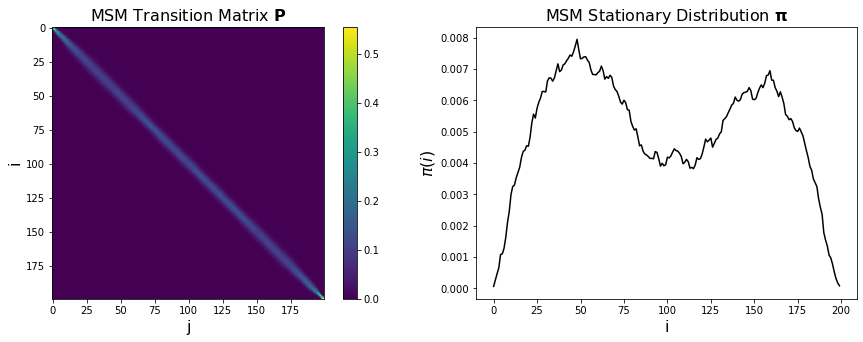

Free energy profile suggests 3 minima.
Minima  (-0.912, 0.083)
Minima  (0.95, 0.286)
Minima  (3.4, 21.365)


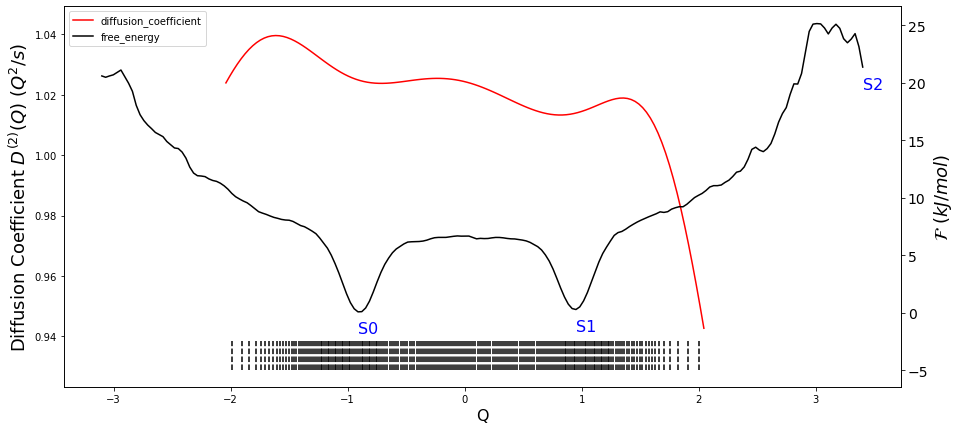

Kramer's Rates
-------------------------
S0 --> S1 : 2.876453e-01
S0 --> S2 : 1.562292e-04
S1 --> S0 : 3.124568e-01
S1 --> S2 : 5.375022e-04
S2 --> S0 : 2.269433e-03
S2 --> S1 : 2.361716e-02
-------------------------


[((0, 1), 0.2876453346110443),
 ((0, 2), 0.0001562291685749583),
 ((1, 0), 0.312456838061757),
 ((1, 2), 0.0005375021926012641),
 ((2, 0), 0.0022694325849045133),
 ((2, 1), 0.023617163229822002)]

In [114]:
kre.fit(TICA_traj, 
        beta, 
        sigmaD=0.5,
        sigmaF=0.025,
        lag=15,
        time_step=step_size,
        k=200)

/home/dominic/PycharmProjects/mdfeature/src/mdfeature/KramersRateEvaluator.py:33: UserWarning: NaN values were found in the free energy calculation. Consider using a longer trajectory or rerunning with fewer bins (currently bins=200). Fixing with imputation for now.
  warnings.warn(f"NaN values were found in the free energy calculation. "


Note: Of the 200 free energy evaluations, 1 were NaN values.
Using default clustering provided.


estimating MaximumLikelihoodMSM:   0%|                                                                        …

0.0001 <class 'float'>
[4.58934022 3.88235599 3.37656155 2.79341757 2.16680816 2.3004531
 2.05682719 1.82170142 1.75110742 1.8001794  1.62108989 1.55619933
 1.45635399 1.35497551 1.35189436 1.3289721  1.28179649 1.32859425
 1.26475125 1.27080333 1.27543724 1.23925178 1.26827978 1.23666985
 1.20652777 1.22421544 1.17110846 1.21798767 1.20860437 1.20675666
 1.18088977 1.19501871 1.17035668 1.18146813 1.21061097 1.17316916
 1.19926755 1.17975285 1.18093971 1.19116325 1.16325849 1.1571314
 1.1692153  1.19488862 1.20766002 1.23377936 1.18564312 1.19368322
 1.19654994 1.20759503 1.22886909 1.19764767 1.20669725 1.18802152
 1.20282505 1.19530915 1.17986983 1.17259296 1.18156495 1.19973111
 1.19255165 1.22443337 1.26224835 1.28725235 1.31683832 1.27945941
 1.29202141 1.29594548 1.28500969 1.35867187 1.30651497 1.32893036
 1.32998492 1.31361232 1.34813673 1.33727101 1.34295992 1.32263556
 1.29766325 1.31878049 1.26574323 1.21461658 1.22916883 1.29596979
 1.27091609 1.26009831 1.28874099 1.23664

0.001 <class 'float'>
[1.26320972 1.33509372 1.22723921 1.23328808 1.03748959 1.21746894
 1.18097353 1.10467195 1.09548118 1.12112904 1.07533187 1.06481227
 1.07114931 1.05018011 1.03314131 1.08327366 1.03893724 1.00253234
 1.00322225 1.02428886 1.05443073 1.03268702 1.0180561  1.02295359
 0.99395545 0.99484267 0.99534308 1.01405134 0.99655125 0.98732817
 1.00843399 1.03493289 0.99667107 0.99393435 1.02667812 1.02120254
 1.01119677 1.03288203 1.02336973 1.01814335 1.00227409 0.99771075
 0.98895787 1.02038477 1.01545847 1.03540424 1.03097455 1.02021133
 1.01219813 1.0195237  1.00202455 1.01730798 0.98415951 0.99859731
 1.00015373 1.01174431 1.01519088 1.00731853 1.00813111 1.03043473
 1.00276238 0.99169178 1.01502794 1.05063232 1.04212758 1.04174148
 1.05452512 1.05435108 1.02324538 1.02390408 1.03163597 1.05909747
 1.03614708 1.05955782 1.07285806 1.03016277 1.03028089 1.02851935
 1.03391765 1.02613947 1.02917323 1.00641118 0.99841899 1.04077119
 1.03798585 1.06333886 1.05746144 1.0536

0.007500000000000001 <class 'float'>
[0.41841956 1.00780815 1.15688342 0.86340898 0.87179831 1.00464552
 1.06069175 0.95971974 0.90635279 0.87425634 0.88945069 0.92112006
 0.89260541 0.90695286 0.92335943 0.93140377 0.92587773 0.91463556
 0.91237094 0.96792822 0.99843749 0.95891984 0.93256094 0.93080887
 0.92367469 0.91290152 0.93539352 0.9546902  0.96771749 0.94690023
 0.94116139 0.94012001 0.93058907 0.95428307 0.95697791 0.925332
 0.91694562 0.94280753 0.97027868 0.9772138  0.97431187 0.94954652
 0.96957664 0.97838259 0.97148271 0.98279025 0.97886725 0.99055567
 0.97876329 0.97144718 0.98322899 0.9818044  0.97956025 0.9770111
 0.96022267 0.96246396 0.96237988 0.95380563 0.97169474 0.97182385
 0.94779644 0.97333375 1.00579783 1.00429708 0.99419432 1.02600179
 1.03281025 1.03734633 1.04170642 1.04030622 1.04658768 1.04758765
 1.04775861 1.01537635 0.98985484 0.96832602 0.96808629 0.92519856
 0.92913234 0.92718387 0.97138939 0.98675336 1.00609438 1.04052024
 1.00997671 0.99964104 1.021

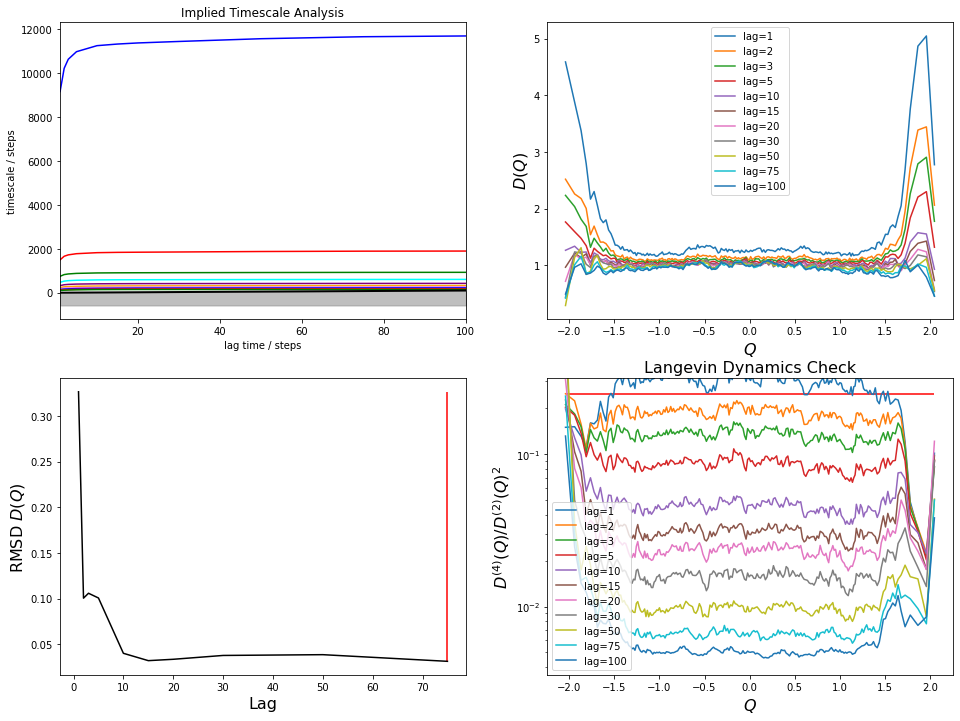

0.0015 <class 'float'>
[0.96404559 1.21209252 1.13438667 1.20011111 0.9988924  1.14771985
 1.18699524 1.08644874 1.0577075  1.07797619 1.02778674 1.05327339
 1.02919475 1.00438597 1.00264605 1.05699209 1.0084213  0.99811629
 0.99837876 1.00916308 1.05270584 1.0217147  1.02145102 1.01684811
 0.98497391 0.98631841 0.97834328 0.97218018 0.99559085 0.97487331
 0.99277101 1.01799248 0.98054253 1.00751924 1.02081381 1.0214522
 1.02076985 1.02975388 1.01672822 1.01505157 1.01172502 1.00325215
 0.98703178 1.01055094 1.01037529 1.03258565 1.01968763 1.02240513
 1.01168964 1.01242914 1.00933737 1.01077667 0.97568969 0.98747345
 0.98582516 0.99171573 1.00319914 1.00288949 0.99987982 1.02737584
 0.99528288 0.98878734 1.00914452 1.0329814  1.04597137 1.0385565
 1.04507639 1.0537794  1.02337958 1.00065931 1.02175009 1.04136431
 1.04456231 1.08107287 1.06865492 1.03689674 1.01535193 1.02229375
 1.01621665 1.01908511 1.00412094 0.99512175 1.00949583 1.03423353
 1.03514661 1.05822245 1.04348856 1.04494

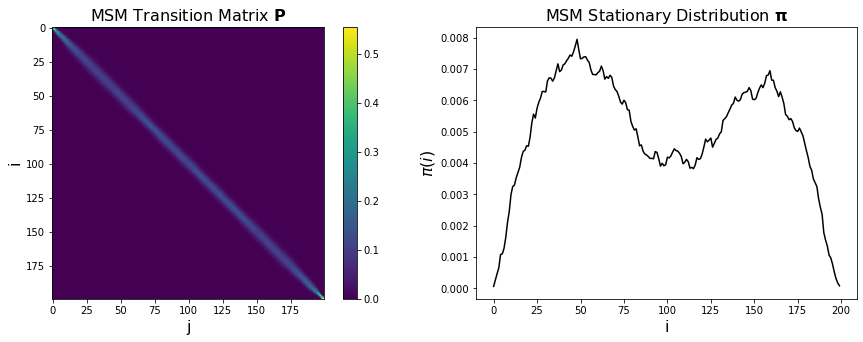

Free energy profile suggests 3 minima.
Minima  (-3.529, 21.34)
Minima  (-1.01, 0.281)
Minima  (0.904, 0.078)


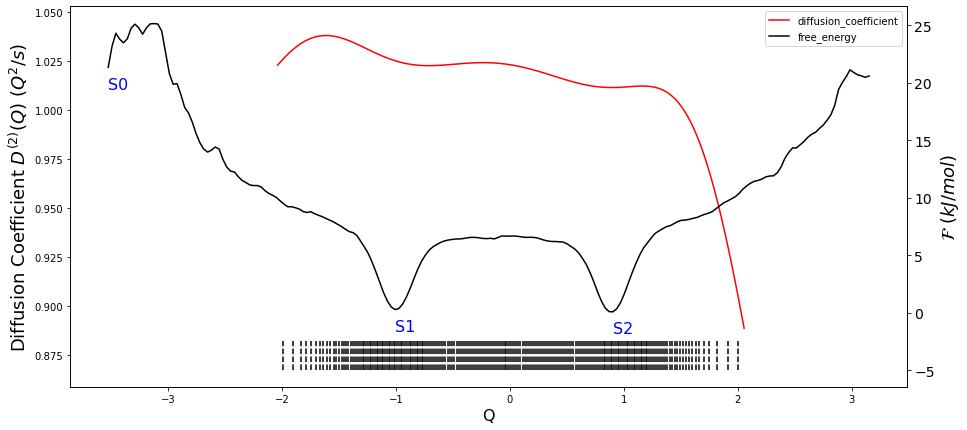

Kramer's Rates
-------------------------
S0 --> S1 : 3.395967e-02
S0 --> S2 : 2.875283e-03
S1 --> S0 : 6.786203e-04
S1 --> S2 : 2.988732e-01
S2 --> S0 : 1.976913e-04
S2 --> S1 : 2.688057e-01
-------------------------


[((0, 1), 0.03395966837502605),
 ((0, 2), 0.00287528322064529),
 ((1, 0), 0.0006786202553385698),
 ((1, 2), 0.2988732390600049),
 ((2, 0), 0.00019769127513104309),
 ((2, 1), 0.26880567178056036)]

In [115]:
kre.fit(VAMP_traj, 
        beta, 
        sigmaD=0.5,
        sigmaF=0.025,
        lag=15,
        time_step=step_size,
        k=200)

/home/dominic/PycharmProjects/mdfeature/src/mdfeature/KramersRateEvaluator.py:33: UserWarning: NaN values were found in the free energy calculation. Consider using a longer trajectory or rerunning with fewer bins (currently bins=200). Fixing with imputation for now.
  warnings.warn(f"NaN values were found in the free energy calculation. "


Note: Of the 200 free energy evaluations, 1 were NaN values.
Using default clustering provided.


estimating MaximumLikelihoodMSM:   0%|                                                                        …

0.0001 <class 'float'>
[4.58934022 3.88235599 3.37656155 2.79341757 2.16680816 2.3004531
 2.05682719 1.82170142 1.75110742 1.8001794  1.62108989 1.55619933
 1.45635399 1.35497551 1.35189436 1.3289721  1.28179649 1.32859425
 1.26475125 1.27080333 1.27543724 1.23925178 1.26827978 1.23666985
 1.20652777 1.22421544 1.17110846 1.21798767 1.20860437 1.20675666
 1.18088977 1.19501871 1.17035668 1.18146813 1.21061097 1.17316916
 1.19926755 1.17975285 1.18093971 1.19116325 1.16325849 1.1571314
 1.1692153  1.19488862 1.20766002 1.23377936 1.18564312 1.19368322
 1.19654994 1.20759503 1.22886909 1.19764767 1.20669725 1.18802152
 1.20282505 1.19530915 1.17986983 1.17259296 1.18156495 1.19973111
 1.19255165 1.22443337 1.26224835 1.28725235 1.31683832 1.27945941
 1.29202141 1.29594548 1.28500969 1.35867187 1.30651497 1.32893036
 1.32998492 1.31361232 1.34813673 1.33727101 1.34295992 1.32263556
 1.29766325 1.31878049 1.26574323 1.21461658 1.22916883 1.29596979
 1.27091609 1.26009831 1.28874099 1.23664

0.001 <class 'float'>
[1.26320972 1.33509372 1.22723921 1.23328808 1.03748959 1.21746894
 1.18097353 1.10467195 1.09548118 1.12112904 1.07533187 1.06481227
 1.07114931 1.05018011 1.03314131 1.08327366 1.03893724 1.00253234
 1.00322225 1.02428886 1.05443073 1.03268702 1.0180561  1.02295359
 0.99395545 0.99484267 0.99534308 1.01405134 0.99655125 0.98732817
 1.00843399 1.03493289 0.99667107 0.99393435 1.02667812 1.02120254
 1.01119677 1.03288203 1.02336973 1.01814335 1.00227409 0.99771075
 0.98895787 1.02038477 1.01545847 1.03540424 1.03097455 1.02021133
 1.01219813 1.0195237  1.00202455 1.01730798 0.98415951 0.99859731
 1.00015373 1.01174431 1.01519088 1.00731853 1.00813111 1.03043473
 1.00276238 0.99169178 1.01502794 1.05063232 1.04212758 1.04174148
 1.05452512 1.05435108 1.02324538 1.02390408 1.03163597 1.05909747
 1.03614708 1.05955782 1.07285806 1.03016277 1.03028089 1.02851935
 1.03391765 1.02613947 1.02917323 1.00641118 0.99841899 1.04077119
 1.03798585 1.06333886 1.05746144 1.0536

0.007500000000000001 <class 'float'>
[0.41841956 1.00780815 1.15688342 0.86340898 0.87179831 1.00464552
 1.06069175 0.95971974 0.90635279 0.87425634 0.88945069 0.92112006
 0.89260541 0.90695286 0.92335943 0.93140377 0.92587773 0.91463556
 0.91237094 0.96792822 0.99843749 0.95891984 0.93256094 0.93080887
 0.92367469 0.91290152 0.93539352 0.9546902  0.96771749 0.94690023
 0.94116139 0.94012001 0.93058907 0.95428307 0.95697791 0.925332
 0.91694562 0.94280753 0.97027868 0.9772138  0.97431187 0.94954652
 0.96957664 0.97838259 0.97148271 0.98279025 0.97886725 0.99055567
 0.97876329 0.97144718 0.98322899 0.9818044  0.97956025 0.9770111
 0.96022267 0.96246396 0.96237988 0.95380563 0.97169474 0.97182385
 0.94779644 0.97333375 1.00579783 1.00429708 0.99419432 1.02600179
 1.03281025 1.03734633 1.04170642 1.04030622 1.04658768 1.04758765
 1.04775861 1.01537635 0.98985484 0.96832602 0.96808629 0.92519856
 0.92913234 0.92718387 0.97138939 0.98675336 1.00609438 1.04052024
 1.00997671 0.99964104 1.021

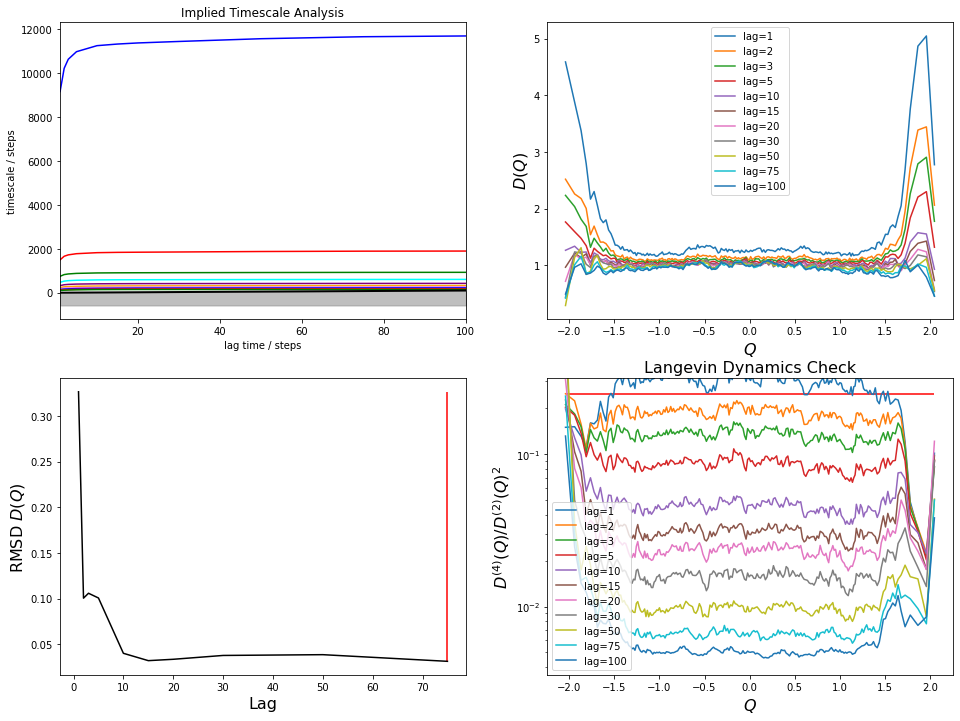

0.0015 <class 'float'>
[0.96404559 1.21209252 1.13438667 1.20011111 0.9988924  1.14771985
 1.18699524 1.08644874 1.0577075  1.07797619 1.02778674 1.05327339
 1.02919475 1.00438597 1.00264605 1.05699209 1.0084213  0.99811629
 0.99837876 1.00916308 1.05270584 1.0217147  1.02145102 1.01684811
 0.98497391 0.98631841 0.97834328 0.97218018 0.99559085 0.97487331
 0.99277101 1.01799248 0.98054253 1.00751924 1.02081381 1.0214522
 1.02076985 1.02975388 1.01672822 1.01505157 1.01172502 1.00325215
 0.98703178 1.01055094 1.01037529 1.03258565 1.01968763 1.02240513
 1.01168964 1.01242914 1.00933737 1.01077667 0.97568969 0.98747345
 0.98582516 0.99171573 1.00319914 1.00288949 0.99987982 1.02737584
 0.99528288 0.98878734 1.00914452 1.0329814  1.04597137 1.0385565
 1.04507639 1.0537794  1.02337958 1.00065931 1.02175009 1.04136431
 1.04456231 1.08107287 1.06865492 1.03689674 1.01535193 1.02229375
 1.01621665 1.01908511 1.00412094 0.99512175 1.00949583 1.03423353
 1.03514661 1.05822245 1.04348856 1.04494

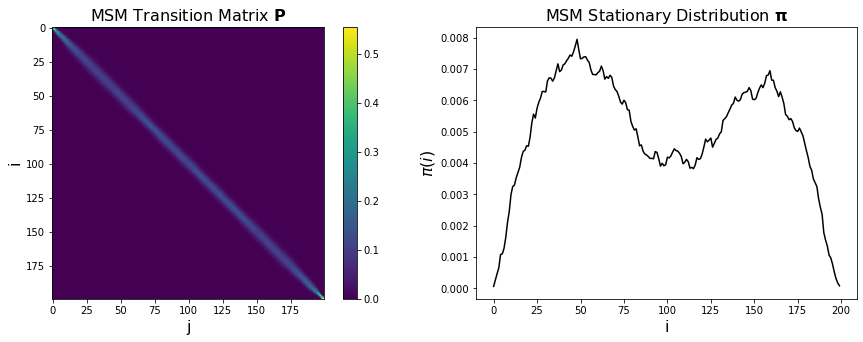

KeyboardInterrupt: 

In [154]:
kre.fit(DMAP_traj.dmap[:,0], 
        beta, 
        sigmaD=0.5,
        sigmaF=0.025,
        lag=15,
        time_step=step_size,
        k=200)

In [ ]:
Code
Train PCA
Train tICA
Train VAMPnet

In [ ]:
ring_double_traj = np.concatenate(ring_double_well_samples)
ring_dmap = dmap.fit(ring_double_traj)
D1 = diffusion_map.dmap[:,0]
plt.hist(D1)

### Muller brown samples

In [28]:
muller_brown_samples = muller_brown_sampler.simulate(number_of_steps=10000000, burn_in=4000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 909090/909090 [39:56<00:00, 379.39it/s]


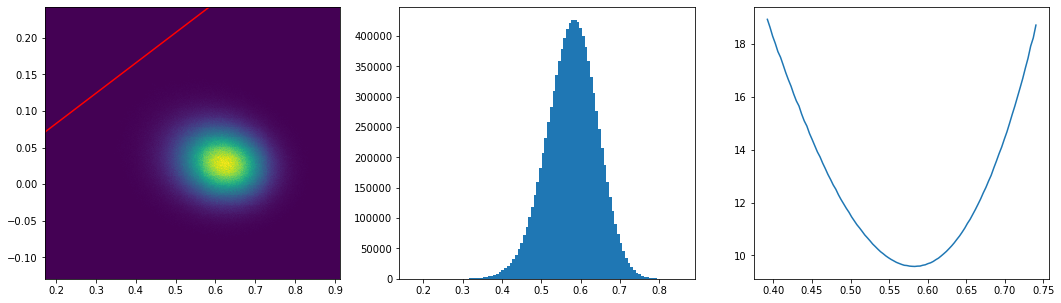

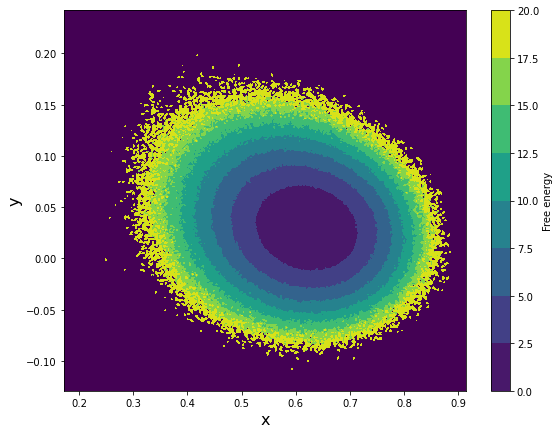

In [29]:
muller_brown_projected_traj = plot_free_energy_slice(muller_brown_samples, beta, np.array([0,0]), np.pi/8, minimum_counts=5000)
plot_free_energy_surface(muller_brown_samples, beta)